In [64]:
import pickle
import torch 
from torch_geometric.data import Data
from torch.utils.data import SubsetRandomSampler, DataLoader
import networkx as nx
import matplotlib.pyplot as plt

# Path to your .pkl file
file_path = '/home/t.hsu/example2/work_dir/dataset/graph/HGraph-h5-Bi_soc-5l-FromDFT.pkl'

data = torch.load(file_path)
dataset = data[0]
print(dataset)

Data(atom_num_orbital=[2916], edge_attr=[123924, 10], edge_index=[2, 123924], spinful=[81], stru_id=[81], subgraph_dict=[81], term_mask=[123924], term_real=[123924, 19, 19, 8], x=[2916])


In [6]:
print('num_nodes:\n', dataset.num_nodes)
print('num_edges:\n', dataset.num_edges)
print('edge_attr: \n', dataset.edge_attr)
print(dataset.edge_index)
print(dataset.atom_num_orbital)

num_nodes:
 2916
num_edges:
 123924
edge_attr: 
 tensor([[ 6.7959, -0.0251,  2.4819,  ...,  4.3714,  7.6419,  6.9063],
        [ 6.5393, -0.0251,  2.4819,  ...,  4.3064, 10.1497, 10.0216],
        [ 7.1287, -0.0251,  2.4819,  ...,  6.5526, 11.3158, 11.7615],
        ...,
        [ 6.9382,  4.9215,  7.5881,  ...,  0.5450,  2.5934, 10.1702],
        [ 4.3414,  4.9215,  7.5881,  ...,  0.4744,  0.0393, 11.7866],
        [ 7.5091,  4.9215,  7.5881,  ..., -1.7610,  3.7495, 11.7483]])
tensor([[ 0,  0,  0,  ..., 35, 35, 35],
        [17, 26, 27,  ..., 18, 27, 28]])
tensor([19, 19, 19,  ..., 19, 19, 19])


A = (36, 36)
[[81 81 81 ... 72 21 45]
 [81 81 81 ... 45 73 21]
 [81 81 81 ... 21 45 73]
 ...
 [72 45 21 ... 81 81 81]
 [21 73 45 ... 81 81 81]
 [45 21 73 ... 81 81 81]]


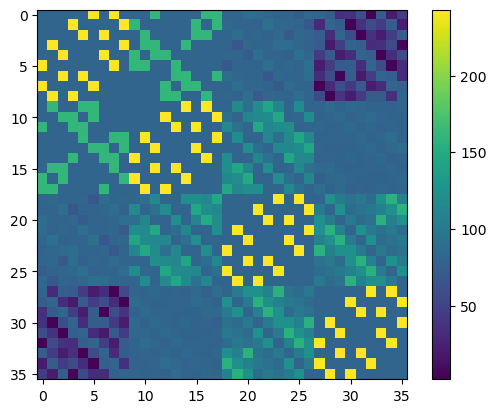

In [7]:
from torch_geometric.utils import to_dense_adj
A = to_dense_adj(dataset.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

plt.imshow(A)
plt.colorbar()
plt.show()

/home/t.hsu/miniconda3/envs/minideeph/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  node_collection = ax.scatter(


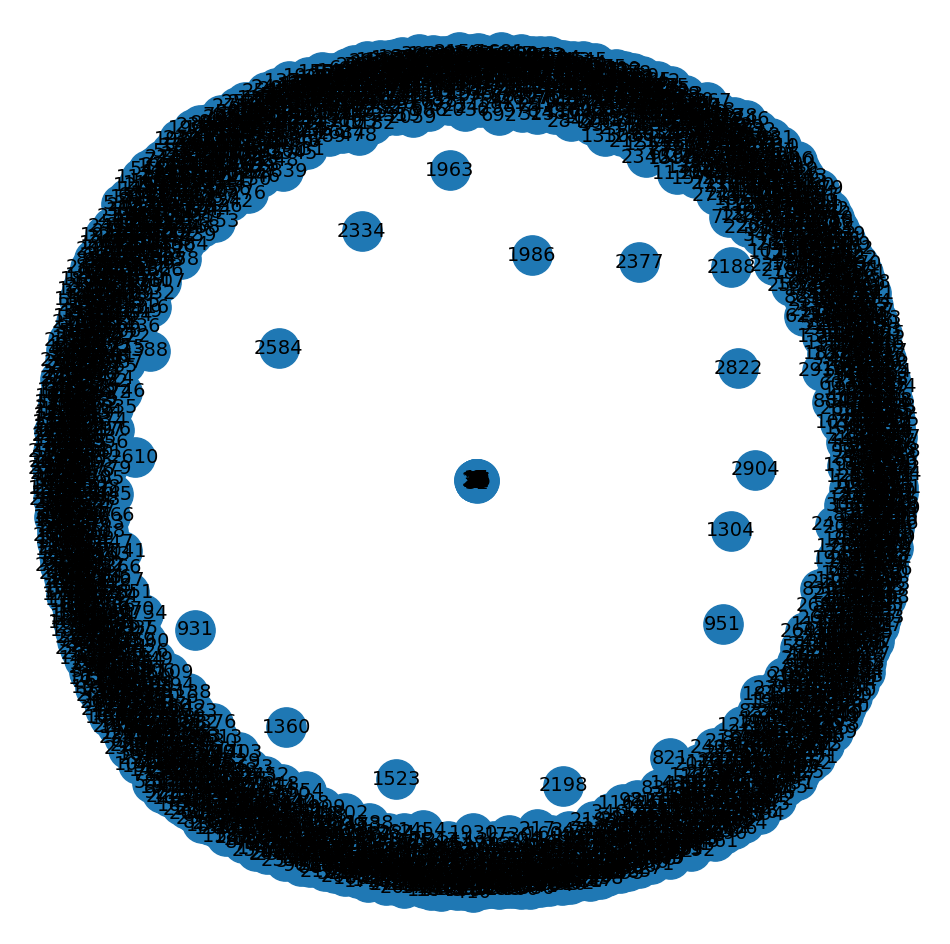

In [ ]:
# from torch_geometric.utils import to_networkx

# G = to_networkx(dataset, to_undirected=False)
# plt.figure(figsize=(12,12))
# plt.axis('off')
# nx.draw_networkx(G,
#                 pos=nx.spring_layout(G, seed=0),
#                 with_labels=True,
#                 node_size=800,
#                 cmap="hsv",
#                 vmin=-2,
#                 vmax=3,
#                 width=0.8,
#                 edge_color="grey",
#                 font_size=14
#                 )
# plt.show()

In [9]:
dataset2 = data[1]
dataset2

{'x': tensor([   0,   36,   72,  108,  144,  180,  216,  252,  288,  324,  360,  396,
          432,  468,  504,  540,  576,  612,  648,  684,  720,  756,  792,  828,
          864,  900,  936,  972, 1008, 1044, 1080, 1116, 1152, 1188, 1224, 1260,
         1296, 1332, 1368, 1404, 1440, 1476, 1512, 1548, 1584, 1620, 1656, 1692,
         1728, 1764, 1800, 1836, 1872, 1908, 1944, 1980, 2016, 2052, 2088, 2124,
         2160, 2196, 2232, 2268, 2304, 2340, 2376, 2412, 2448, 2484, 2520, 2556,
         2592, 2628, 2664, 2700, 2736, 2772, 2808, 2844, 2880, 2916]),
 'edge_index': tensor([     0,   1472,   2934,   4390,   5880,   7398,   8944,  10542,  12096,
          13614,  15106,  16630,  18106,  19624,  21144,  22674,  24238,  25824,
          27428,  28986,  30512,  32050,  33544,  35042,  36570,  38090,  39644,
          41230,  42904,  44498,  46054,  47606,  49130,  50624,  52150,  53700,
          55254,  56850,  58444,  60034,  61628,  63188,  64720,  66256,  67794,
          69326,  7

In [22]:
dataset_size = len(data[1])
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)
test_size = int(test_ratio * dataset_size)

In [37]:
from deeph.data import HData
file_path = '/home/t.hsu/example2/work_dir/dataset/graph/HGraph-h5-Bi_soc-5l-FromDFT.pkl'

data, slices, tmp = torch.load(file_path)

In [36]:
dataset_size = len(slices)
data

Data(atom_num_orbital=[2916], edge_attr=[123924, 10], edge_index=[2, 123924], spinful=[81], stru_id=[81], subgraph_dict=[81], term_mask=[123924], term_real=[123924, 19, 19, 8], x=[2916])

In [50]:
dataset = HData(
    raw_data_dir='/home/t.hsu/example2/work_dir/dataset/processed',
    graph_dir='/home/t.hsu/example2/work_dir/dataset/graph',
    interface='h5',
    target='hamiltonian',
    dataset_name='Bi_soc',
    multiprocessing=0,
    radius='-1.0',
    max_num_nbr=0,
    num_l='5',
    max_element='-1',
    create_from_DFT='True',
    if_lcmp_graph='True',
    separate_onsite='False',
    new_sp=False,
    default_dtype_torch=torch.get_default_dtype(),
)

Graph data file: HGraph-h5-Bi_soc-5l-FromDFT.pkl
Use existing graph data file
Atomic types: [83]
Finish loading the processed 81 structures (spinful: True, the number of atomic types: 1), cost 1 seconds


In [61]:
dataset_size = len(dataset)
print(dataset_size)
print(dataset[0])

81
Data(
  atom_num_orbital=[36],
  edge_attr=[1472, 10],
  edge_index=[2, 1472],
  spinful=[1],
  stru_id="0",
  subgraph_dict={
    subgraph_atom_idx=[121080, 2],
    subgraph_edge_idx=[121080],
    subgraph_edge_ang=[121080, 25],
    subgraph_index=[121080]
  },
  term_mask=[1472],
  term_real=[1472, 19, 19, 8],
  x=[36]
)


In [62]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2
train_size = int(train_ratio * dataset_size)
val_size = int(val_ratio * dataset_size)
test_size = int(test_ratio * dataset_size)

In [63]:
indices = list(range(dataset_size))

print(f'number of train set: {len(indices[:train_size])}')
print(f'number of val set: {len(indices[train_size:train_size + val_size])}')
print(f'number of test set: {len(indices[train_size + val_size:train_size + val_size + test_size])}')

number of train set: 48
number of val set: 16
number of test set: 16


In [65]:
train_sampler = SubsetRandomSampler(indices[:train_size])
val_sampler = SubsetRandomSampler(indices[train_size:train_size + val_size])
test_sampler = SubsetRandomSampler(indices[train_size + val_size:train_size + val_size + test_size])